In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# 配置图形样式
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

载入数据

In [2]:
# Load the data into DataFrames
train_users = pd.read_csv('/Users/chandler/Documents/Data/Airbnb_competition/train_users_2.csv')
test_users = pd.read_csv('/Users/chandler/Documents/Data/Airbnb_competition/test_users.csv')

查看训练集和测试集

In [3]:
print(train_users.shape[0], "users in the training set\n", 
      test_users.shape[0], "users in the test set")

213451 users in the training set
 62096 users in the test set


合并train和test并且丢掉id

In [4]:
# 合并训练集和测试集
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

# 丢掉ID
users.drop('id',axis=1, inplace=True)

users.head(20)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20100101215619
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100102012558
7,direct,direct,47.0,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100103191905
8,other,craigslist,50.0,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100104004211
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,en,Web,0,basic,20100104023758


In [5]:
users.columns

Index(['affiliate_channel', 'affiliate_provider', 'age', 'country_destination',
       'date_account_created', 'date_first_booking', 'first_affiliate_tracked',
       'first_browser', 'first_device_type', 'gender', 'language',
       'signup_app', 'signup_flow', 'signup_method', 'timestamp_first_active'],
      dtype='object')

查看脏数据并做出相应处理

In [6]:
users[users['gender']=='-unknown-']['gender'].count()

129480

替换gender列的'-unknown-'为NaN

In [7]:
users['gender'].replace('-unknown-', np.nan, inplace=True)

In [8]:
users[users['gender']=='-unknown-']['gender'].count()

0

In [9]:
# 成功把-unknown-替换为NaN
users['gender'].isnull().sum()

129480

查看每一列的NaN值

In [10]:
users.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                        116866
country_destination         62096
date_account_created            0
date_first_booking         186639
first_affiliate_tracked      6085
first_browser                   0
first_device_type               0
gender                     129480
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

看到date_first_booking的缺失值非常多，远远超过数据集一半，然后再看看年龄有没有异常值

In [11]:
users[users['age']>100]['age'].count()

2690

In [12]:
users[users['age']<16]['age'].count()

68

把age的异常值替换为NaN

In [13]:
users.loc[users.age > 100, 'age'] = np.nan
users.loc[users.age < 16, 'age'] = np.nan

In [14]:
users[users['age']>100]['age'].count()

0

In [15]:
users[users['age']<16]['age'].count()

0

计算新用户首次使用时间

In [16]:
users.columns

Index(['affiliate_channel', 'affiliate_provider', 'age', 'country_destination',
       'date_account_created', 'date_first_booking', 'first_affiliate_tracked',
       'first_browser', 'first_device_type', 'gender', 'language',
       'signup_app', 'signup_flow', 'signup_method', 'timestamp_first_active'],
      dtype='object')

In [17]:
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

In [18]:
users[['date_account_created','date_first_booking']].head(10)

,date_account_created,date_first_booking
0,2010-06-28,NaN
1,2011-05-25,NaN
2,2010-09-28,2010-08-02
3,2011-12-05,2012-09-08
4,2010-09-14,2010-02-18
5,2010-01-01,2010-01-02
6,2010-01-02,2010-01-05
7,2010-01-03,2010-01-13
8,2010-01-04,2010-07-29
9,2010-01-04,2010-01-04


In [19]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['timestamp_first_active'] = pd.to_datetime((users.timestamp_first_active // 1000000), format='%Y%m%d')

In [20]:
users[['date_account_created','date_first_booking','timestamp_first_active']].head()

,date_account_created,date_first_booking,timestamp_first_active
0,2010-06-28,NaT,2009-03-19
1,2011-05-25,NaT,2009-05-23
2,2010-09-28,2010-08-02,2009-06-09
3,2011-12-05,2012-09-08,2009-10-31
4,2010-09-14,2010-02-18,2009-12-08


In [21]:
users.columns

Index(['affiliate_channel', 'affiliate_provider', 'age', 'country_destination',
       'date_account_created', 'date_first_booking', 'first_affiliate_tracked',
       'first_browser', 'first_device_type', 'gender', 'language',
       'signup_app', 'signup_flow', 'signup_method', 'timestamp_first_active'],
      dtype='object')

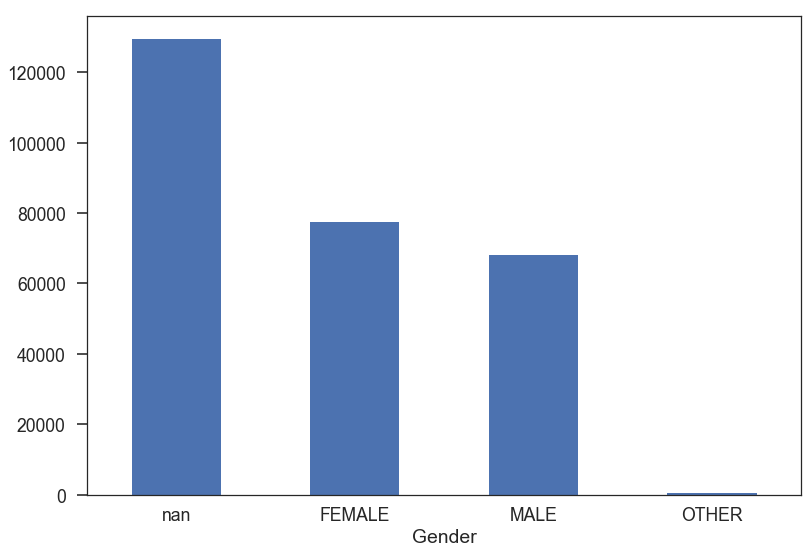

In [22]:
users.gender.value_counts(dropna=False).plot(kind='bar',rot=0)
plt.xlabel('Gender')

性别有很多的缺失值，再看看出行有没有性别的上的区别

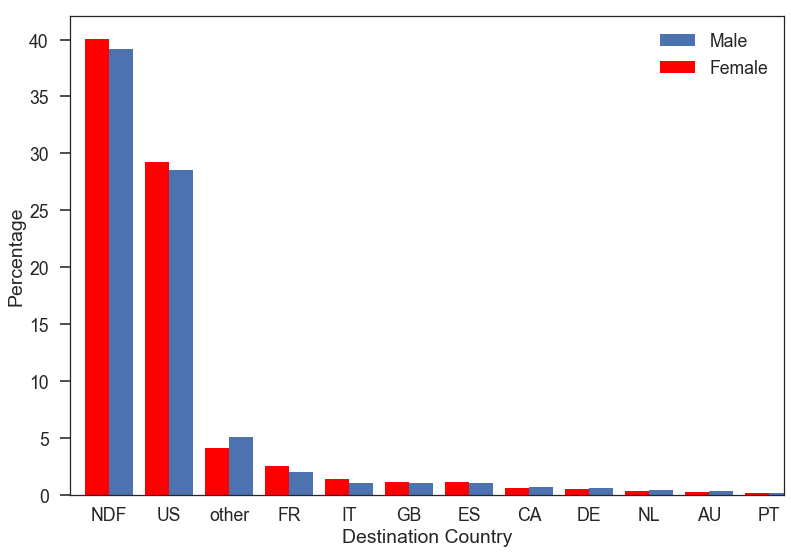

In [23]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='r', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

从这张图上看好像没什么区别，除了知道目的地的频率以外，并不是很有用

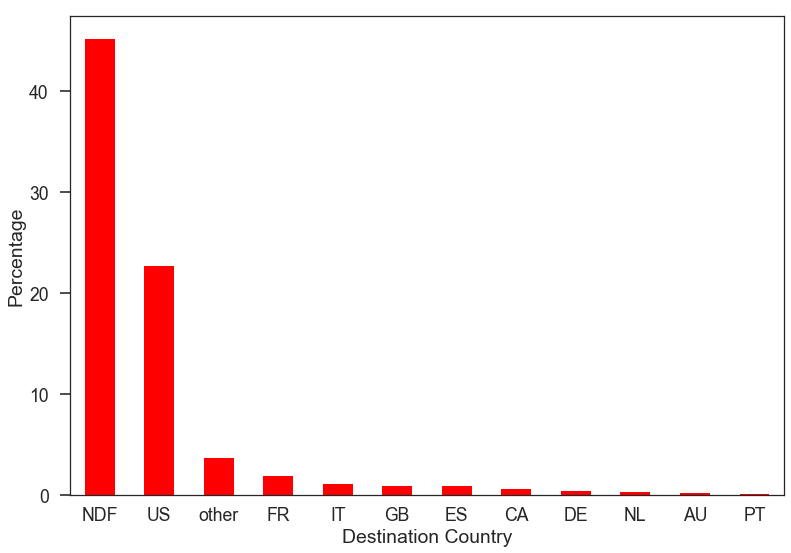

In [24]:
destination_percentage = users.country_destination.value_counts() / users.shape[0] * 100
destination_percentage.plot(kind='bar',color='r', rot=0)

plt.xlabel('Destination Country')
plt.ylabel('Percentage')

从来没有预约的人有45%，其余大部分是美国，再来看看不同年龄用户的选择

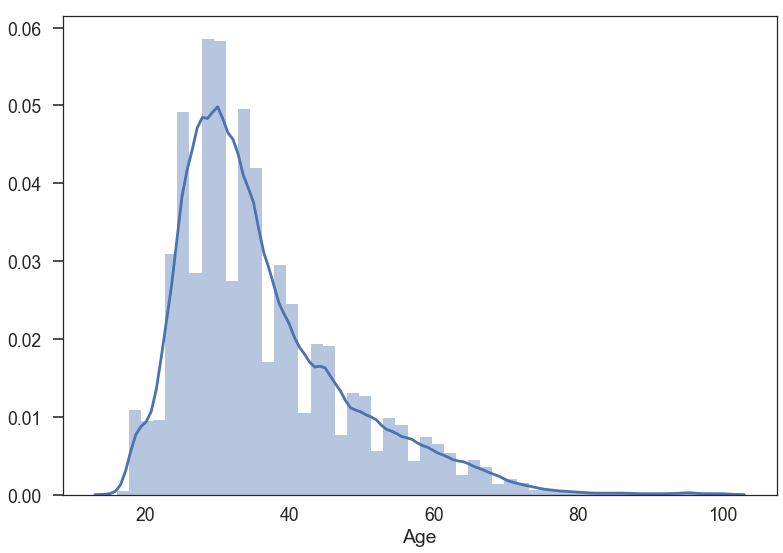

In [25]:
sns.distplot(users.age.dropna())
plt.xlabel('Age')

年龄集中在20至40岁，这些都是产品主要受众群体

再看看随着时间变化的用户数量

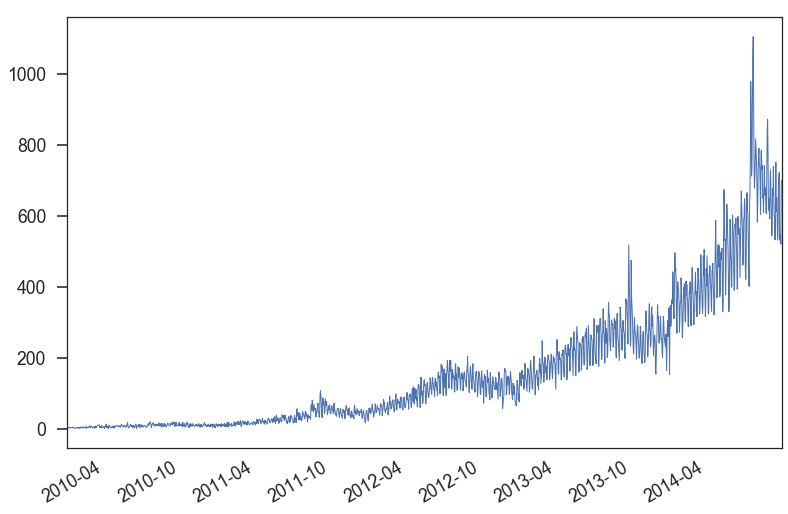

In [26]:
sns.set_context("poster", font_scale=1.1)
users.date_account_created.value_counts().plot(kind='line', linewidth=1)

airbnb增长速度非常的快，再看看用户激活日期

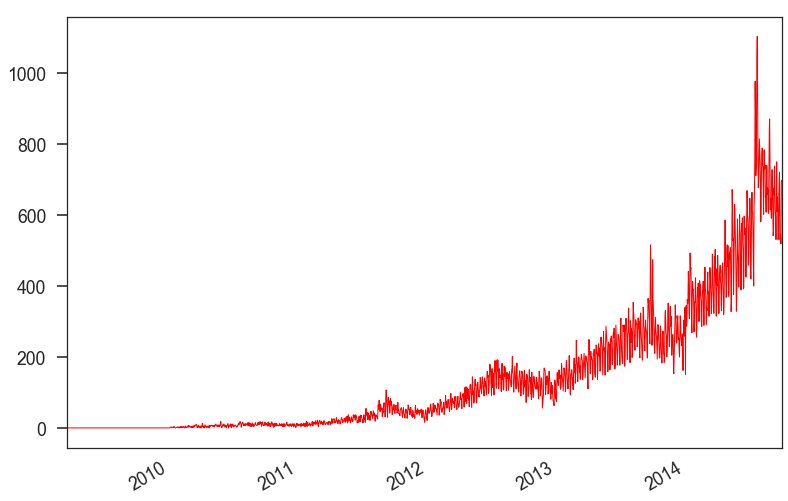

In [27]:
users.timestamp_first_active.value_counts().plot(kind='line', linewidth=1, color='r')

几乎和用户创建增常一样

再细分到每一年看看

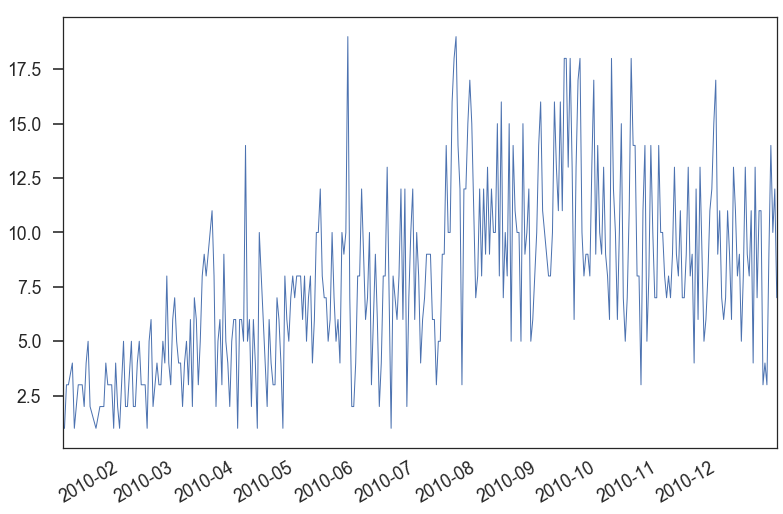

In [34]:
users_2010 = users[users['timestamp_first_active'] > pd.to_datetime(20100101, format='%Y%m%d')]
users_2010 = users_2010[users_2010['timestamp_first_active'] < pd.to_datetime(20110101, format='%Y%m%d')]
users_2010.timestamp_first_active.value_counts().plot(kind='line', linewidth=1)

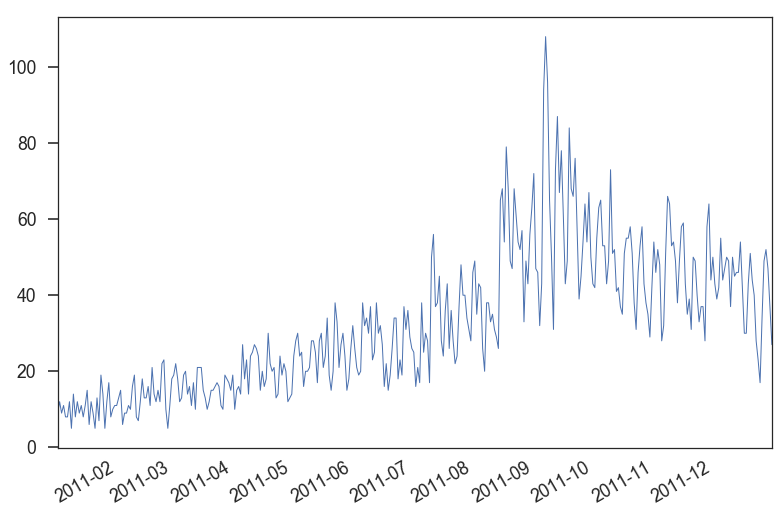

In [37]:
users_2011 = users[users['timestamp_first_active'] > pd.to_datetime(20110101, format='%Y%m%d')]
users_2011 = users_2011[users_2011['timestamp_first_active'] < pd.to_datetime(20120101, format='%Y%m%d')]
users_2011.timestamp_first_active.value_counts().plot(kind='line', linewidth=1)

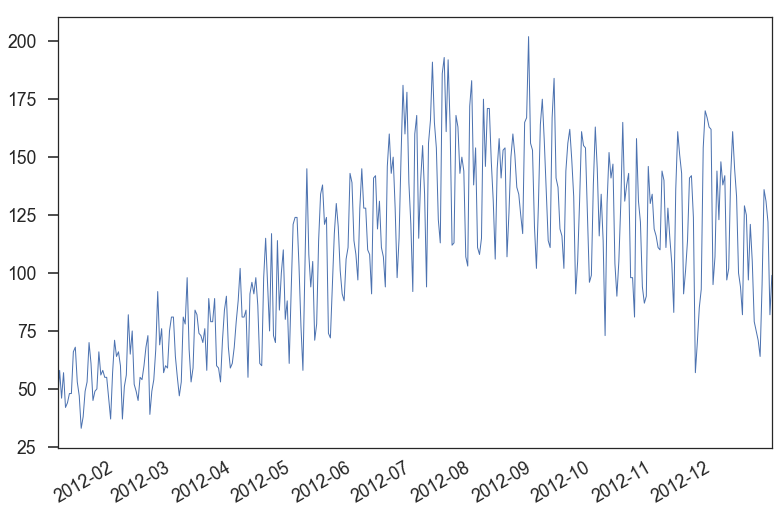

In [38]:
users_2012 = users[users['timestamp_first_active'] > pd.to_datetime(20120101, format='%Y%m%d')]
users_2012 = users_2012[users_2012['timestamp_first_active'] < pd.to_datetime(20130101, format='%Y%m%d')]
users_2012.timestamp_first_active.value_counts().plot(kind='line', linewidth=1)

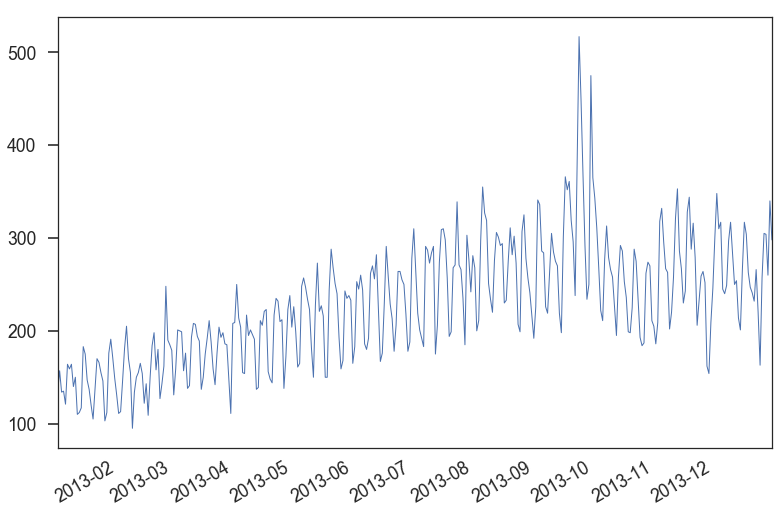

In [39]:
users_2013 = users[users['timestamp_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013 = users_2013[users_2013['timestamp_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
users_2013.timestamp_first_active.value_counts().plot(kind='line', linewidth=1)

每年的趋势是中下旬active会变得很多

In [40]:
def weekday(datas):
    weekdays = []
    for date in datas:
        weekdays.append(date.weekday())
    return weekdays

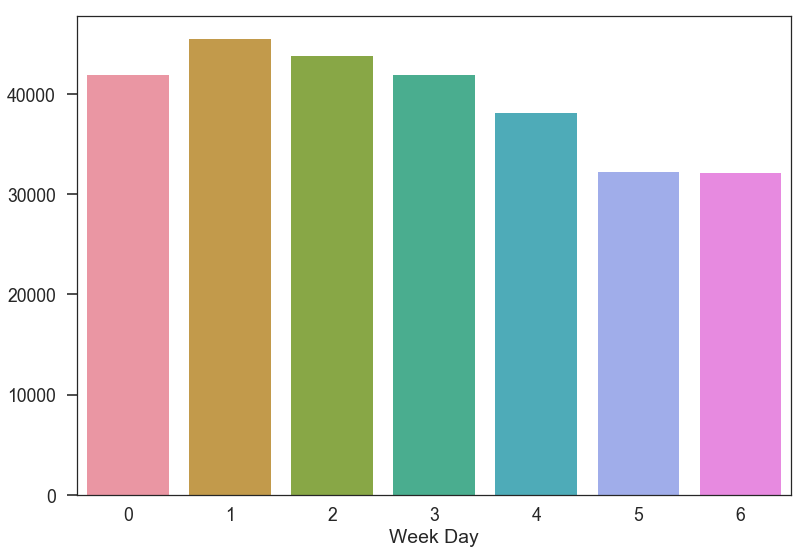

In [41]:
weekdays = pd.Series(weekday(users.date_account_created))
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')

每周的周二新用户最多

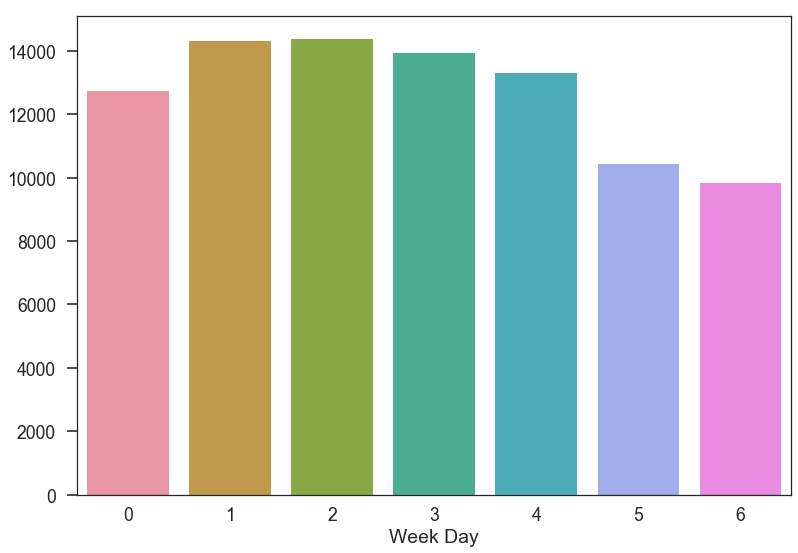

In [42]:
weekdays = pd.Series(weekday(users.date_first_booking))
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')

首次预约每周二和三比较多

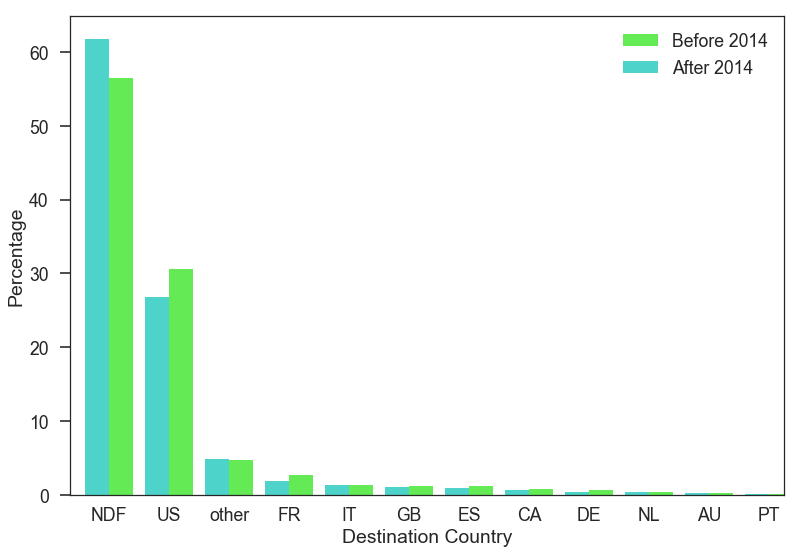

In [43]:
date = pd.to_datetime(20140101, format='%Y%m%d')

before = sum(users.loc[users['timestamp_first_active'] < date, 'country_destination'].value_counts())
after = sum(users.loc[users['timestamp_first_active'] > date, 'country_destination'].value_counts())
before_destinations = users.loc[users['timestamp_first_active'] < date, 'country_destination'].value_counts() / before * 100
after_destinations = users.loc[users['timestamp_first_active'] > date, 'country_destination'].value_counts() / after * 100
before_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Before 2014', rot=0)
after_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='After 2014', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
